In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv("Dataset/Economic_dataset.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1, inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
## check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

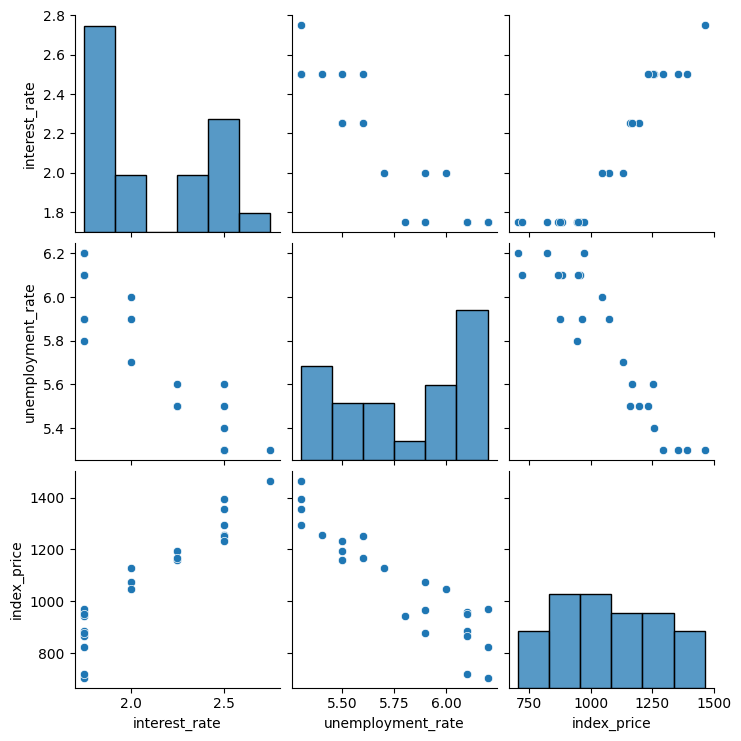

In [7]:
## data visualisation
import seaborn as sns
sns.pairplot(df_index)

In [8]:
## above interest rate and index price is linear relation
## interest rate and unemploment is inversly relation
## unemployment and index price is inversly relation

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

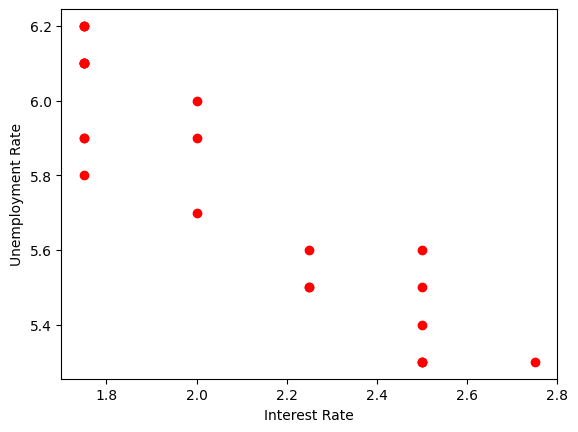

In [10]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [11]:
## independent and dependent features
X = df_index[['interest_rate','unemployment_rate']]
#### Or we can do
### X = df_index.iloc[:,:-1]   [all rows, avoid last coloumn]
y = df_index.iloc[:,-1]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [14]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

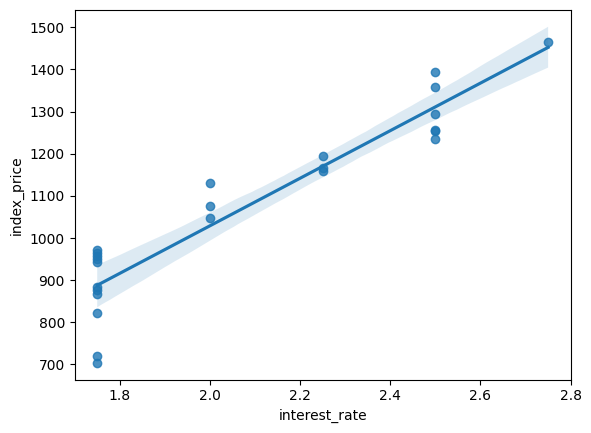

In [15]:
## plots data in a linear regression model
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

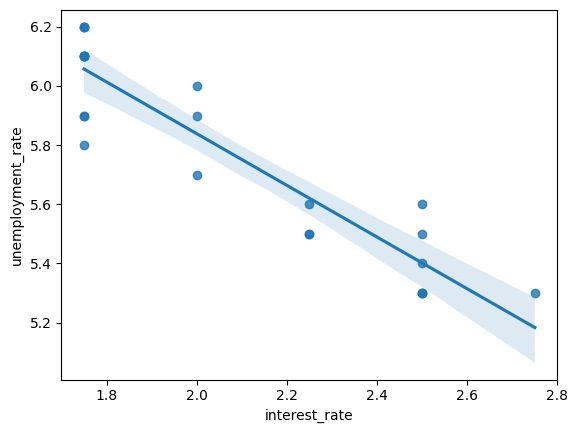

In [ ]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

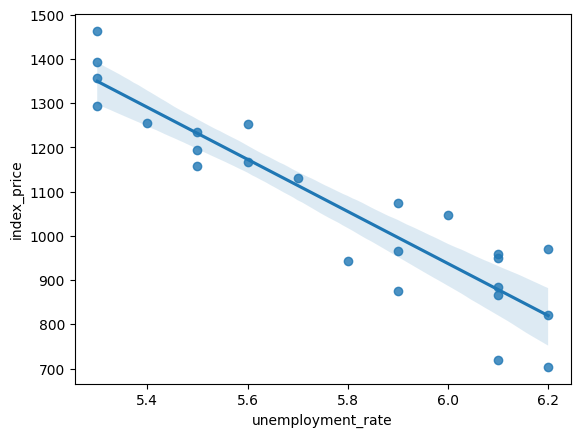

In [ ]:
sns.regplot(x=df_index['unemployment_rate'],y=df_index['index_price'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

[[-0.90115511  0.37908503]
 [ 1.31077107 -1.48187786]
 [-0.90115511  1.30956648]
 [ 1.31077107 -0.55139641]
 [ 1.31077107 -1.48187786]
 [-0.16384638  0.68924552]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -1.48187786]
 [ 1.31077107 -1.17171738]
 [-0.90115511  1.30956648]
 [-0.90115511  0.999406  ]
 [-0.90115511  0.37908503]
 [-0.90115511  0.999406  ]
 [ 0.57346234 -0.8615569 ]
 [-0.16384638 -0.24123593]
 [-0.90115511  0.06892455]
 [-0.90115511  0.999406  ]
 [ 1.31077107 -0.8615569 ]]
[[ 0.57346234 -0.8615569 ]
 [-0.90115511  1.30956648]
 [ 2.0480798  -1.48187786]
 [-0.90115511  0.999406  ]
 [-0.16384638  0.37908503]
 [ 0.57346234 -0.55139641]]


In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
## cross validation
#### 

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,
                                   X_train,y_train,
                                   scoring='neg_mean_squared_error',
                                   cv = 3)

In [ ]:
## the array below is the MSE we get on each step of Cross validation
print(validation_score)
print(np.mean(validation_score))

[-4921.61331265 -7686.87497294 -5135.9962549 ]
-5914.8281801623925


In [ ]:
## Prediction
y_pred = regression.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import r2_score
## Performance Metrices
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
rmsee = np.sqrt(mse)
print("mse: ", mse," mae: ",mae," rmse: ",rmse, " another rmse method: ",rmsee)
## R_Square
score = r2_score(y_test,y_pred)
print(score)
adj_r_square = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r_square)

mse:  5793.76288771258  mae:  59.93578152323554  rmse:  76.11677139574813  another rmse method:  76.11677139574813
0.8278978091457142
0.713163015242857


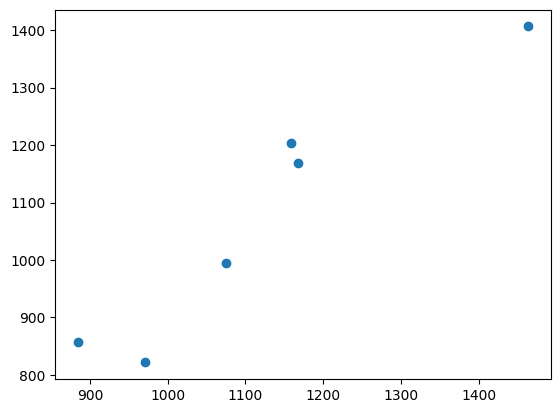

In [ ]:
## Assumptions
plt.scatter(y_test,y_pred)

In [ ]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


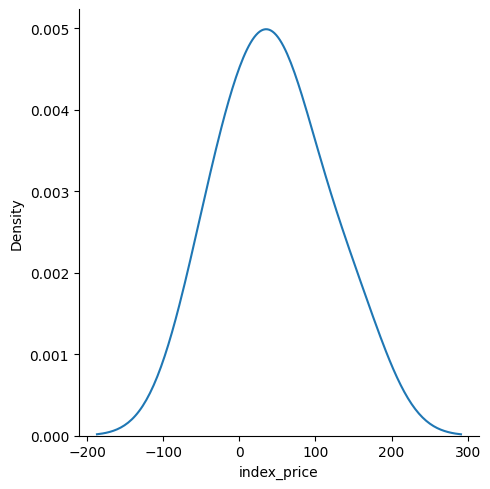

In [ ]:
sns.displot(residuals,kind='kde')

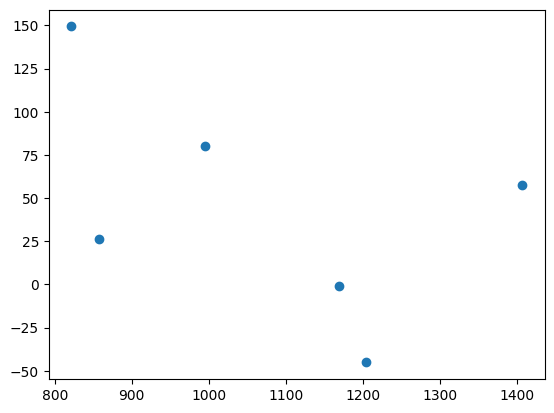

In [ ]:
## scatter plot with respect to prediciton and residuals
plt.scatter(y_pred,residuals)

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train,X_train).fit()

In [ ]:
model.summary()

/home/kali/JosephKB/ML_NLP/KrishNaikUdemy/ML_NLP_Learning_Codes/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 05 Jul 2024   Prob (F-statistic):                       0.754
Time:                        16:36:57   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
regression.coef_

array([  88.27275507, -116.25716066])

So from regression and OLS method we get same coefficient